In [1]:
import pylab
from matplotlib import gridspec
from sklearn.datasets import make_classification
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pickle
import os
import gzip

np.random.seed(1)
import random

In [2]:
n = 50
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0)
Y = Y*2-1 # đổi giá trị 0/1 sang -1/1
X = X.astype(np.float32); Y = Y.astype(np.int32) # features - float, label - int

# Chia dataset thành training và test
train_x, test_x = np.split(X, [ n*8//10])
train_labels, test_labels = np.split(Y, [n*8//10])
print("Features:\n",train_x[0:4])
print("Labels:\n",train_labels[0:4])
X

Features:
 [[-1.7441838  -1.3952037 ]
 [ 2.5921783  -0.08124504]
 [ 0.9218062   0.91789985]
 [-0.8437018  -0.18738253]]
Labels:
 [-1 -1  1 -1]


array([[-1.7441838 , -1.3952037 ],
       [ 2.5921783 , -0.08124504],
       [ 0.9218062 ,  0.91789985],
       [-0.8437018 , -0.18738253],
       [-0.27501205, -1.2619829 ],
       [-1.0643551 ,  1.4976472 ],
       [ 0.3283995 ,  2.2567792 ],
       [-0.1901916 ,  1.7980226 ],
       [-0.98535603, -1.1948034 ],
       [-1.4969323 ,  0.7931335 ],
       [ 0.98437256,  0.65941876],
       [-0.3333734 ,  2.1397214 ],
       [-0.7285899 ,  1.803366  ],
       [-1.4664257 , -0.7687846 ],
       [-0.22474062, -3.310579  ],
       [-1.4772717 , -1.117505  ],
       [-0.48177963, -1.7675456 ],
       [ 0.6963023 , -1.5296369 ],
       [-0.8645401 , -1.2409339 ],
       [ 0.37357292, -0.7524023 ],
       [-0.44710833, -1.6666626 ],
       [-1.332     ,  1.6348586 ],
       [ 0.99987817,  0.12590547],
       [ 0.9846881 ,  0.00422772],
       [ 0.921611  ,  1.3759624 ],
       [-0.55031645, -0.72141516],
       [ 0.5964679 , -1.4156843 ],
       [-1.5297248 ,  0.4452177 ],
       [ 0.25463995,

C:\Users\hnguy\AppData\Local\Temp\ipykernel_4920\2456380072.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


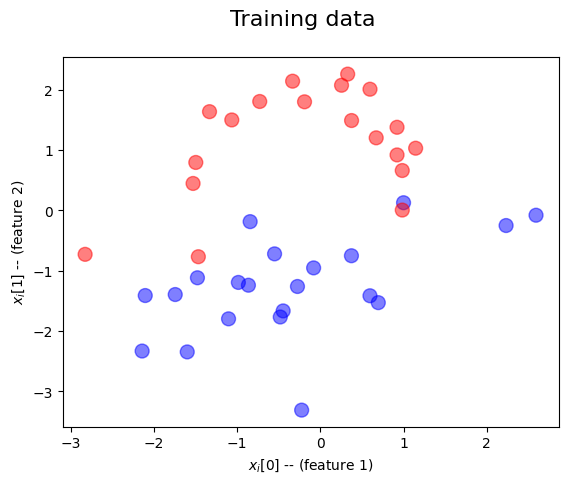

In [3]:
def plot_dataset(suptitle, features, labels):
    # prepare the plot
    fig, ax = pylab.subplots(1, 1)
    #pylab.subplots_adjust(bottom=0.2, wspace=0.4)
    fig.suptitle(suptitle, fontsize = 16)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')

    colors = ['r' if l>0 else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    fig.show()

plot_dataset('Training data', train_x, train_labels)

In [4]:
pos_examples = np.array([ [t[0], t[1], 1] for i,t in enumerate(train_x) 
                          if train_labels[i]>0])
neg_examples = np.array([ [t[0], t[1], 1] for i,t in enumerate(train_x) 
                          if train_labels[i]<0])
print(pos_examples[0:3])
print(neg_examples[0:3])

[[ 0.92180622  0.91789985  1.        ]
 [-1.06435513  1.49764717  1.        ]
 [ 0.32839951  2.25677919  1.        ]]
[[-1.74418378 -1.39520371  1.        ]
 [ 2.59217834 -0.08124504  1.        ]
 [-0.84370178 -0.18738253  1.        ]]


In [5]:
def train(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    
    # Khởi tạo giá trị ban đầu cho weights. 
    # Để đơn giản khởi tạo tất cả trọng số = 0, tuy nhiên khuyến khích khởi tạo giá trị ngẫu nhiên
    weights = np.zeros((num_dims,1)) 
    
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    report_frequency = 10
    
    for i in range(num_iterations):
        # Lấy một positive và một neg
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)   
        if z < 0: # positive phân loại thành negative
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0: # negative phân loại thành positive
            weights = weights - neg.reshape(weights.shape)
# Định kỳ in độ chính xác 
        if i % report_frequency == 0:             
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            print("Iteration={}, pos correct={}, neg correct={}".format(i,pos_correct,neg_correct))

    return weights

In [6]:
wts = train(pos_examples,neg_examples,1000)
# print(wts.transpose())

Iteration=0, pos correct=0.6842105263157895, neg correct=1.0
Iteration=10, pos correct=0.8947368421052632, neg correct=0.8095238095238095
Iteration=20, pos correct=0.8947368421052632, neg correct=0.9523809523809523
Iteration=30, pos correct=0.9473684210526315, neg correct=0.8095238095238095
Iteration=40, pos correct=1.0, neg correct=0.7619047619047619
Iteration=50, pos correct=0.8421052631578947, neg correct=0.9523809523809523
Iteration=60, pos correct=0.9473684210526315, neg correct=0.9523809523809523
Iteration=70, pos correct=0.9473684210526315, neg correct=0.9523809523809523
Iteration=80, pos correct=0.9473684210526315, neg correct=0.9523809523809523
Iteration=90, pos correct=0.9473684210526315, neg correct=0.9523809523809523
Iteration=100, pos correct=0.9473684210526315, neg correct=0.9523809523809523
Iteration=110, pos correct=0.9473684210526315, neg correct=0.9523809523809523
Iteration=120, pos correct=0.9473684210526315, neg correct=0.9523809523809523
Iteration=130, pos correct=

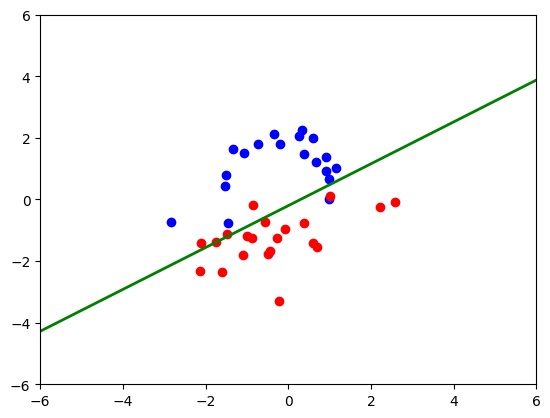

In [7]:
def plot_boundary(positive_examples, negative_examples, weights):
    if np.isclose(weights[1], 0):
        if np.isclose(weights[0], 0):
            x = y = np.array([-6, 6], dtype = 'float32')
        else:
            y = np.array([-6, 6], dtype='float32')
            x = -(weights[1] * y + weights[2])/weights[0]
    else:
        x = np.array([-6, 6], dtype='float32')
        y = -(weights[0] * x + weights[2])/weights[1]

    pylab.xlim(-6, 6)
    pylab.ylim(-6, 6)
    pylab.plot(positive_examples[:,0], positive_examples[:,1], 'bo')
    pylab.plot(negative_examples[:,0], negative_examples[:,1], 'ro')
    pylab.plot(x, y, 'g', linewidth=2.0)
    pylab.show()
plot_boundary(pos_examples,neg_examples,wts)

In [8]:
def accuracy(weights, test_x, test_labels):
    res = np.dot(np.c_[test_x,np.ones(len(test_x))],weights)
    return (res.reshape(test_labels.shape)*test_labels>=0).sum()/float(len(test_labels))

accuracy(wts, test_x, test_labels)

0.9

In [10]:
def train_graph(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # initialize weights
    
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    report_frequency = 15
    snapshots = []
    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)   
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)
        if i % report_frequency == 0:             
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            snapshots.append((np.copy(weights),(pos_correct+neg_correct)/2.0))

    return np.array(snapshots)

snapshots = train_graph(pos_examples,neg_examples)

def plotit(pos_examples,neg_examples,snapshots,step):
    fig = pylab.figure(figsize=(10,4))
    fig.add_subplot(1, 2, 1)
    plot_boundary(pos_examples, neg_examples, snapshots[step][0])
    fig.add_subplot(1, 2, 2)
    pylab.plot(np.arange(len(snapshots[:,1])), snapshots[:,1])
    pylab.ylabel('Accuracy')
    pylab.xlabel('Iteration')
    pylab.plot(step, snapshots[step,1], "bo")
    pylab.show()
def pl1(step): plotit(pos_examples,neg_examples,snapshots,step)
interact(pl1, step=widgets.IntSlider(value=0, min=0, max=len(snapshots)-1))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (7, 2) + inhomogeneous part.